# Analysis: Base Accumulation by Player Ability
***

In this notebook, I evaluate my proposed statistic, Base Accumulation by Player Ability.

In [4]:
import numpy as np 
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
local_path = '../data/PlayerData.csv'

# Select the path that works for you 
file_path = local_path 

# Load the data into a DataFrame 
playerDataDF = pd.read_csv(file_path)

# Inspect some of the data
playerDataDF.head()

,nameFirst,nameLast,playerID,yearID,teamID,lgID,H,1B,2B,3B,...,BB,HBP,SB,CS,AB,BA,OBP,SLG,BAPA,LWTS
0,David,Aardsma,aardsda01,2004,SFN,NL,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.00
1,David,Aardsma,aardsda01,2006,CHN,NL,0,0,0,0,...,0.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN,0.0,-0.50
2,David,Aardsma,aardsda01,2007,CHA,AL,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.00
3,David,Aardsma,aardsda01,2008,BOS,AL,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,-0.25
4,David,Aardsma,aardsda01,2009,SEA,AL,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.00


 y = 0.367100990094 * x + 0.0945894822917
Mean squared error: 0.01
Variance score: 0.72


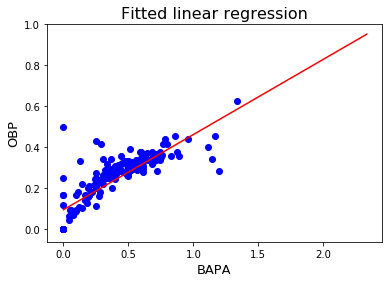

In [29]:
regr = linear_model.LinearRegression()
stat1 = 'BAPA'
stat2 = 'OBP'
df = playerDataDF[[stat1, stat2]].copy()
df = df.dropna(axis=0, how='any')

x = df[stat1]
y = df[stat2]
test_size = int(len(df) * 0.20)
min_x = min(x)
max_x = max(x)

train_data_X = map(lambda x: [x], list(x[:-test_size]))
train_data_Y = list(y[:-test_size])
test_data_X = map(lambda x: [x], list(x[-test_size:]))
test_data_Y = list(y[-test_size:])
regr.fit(train_data_X, train_data_Y)
m = regr.coef_[0]
b = regr.intercept_
print(' y = {0} * x + {1}'.format(m, b))

plt.scatter(test_data_X, test_data_Y, color='blue')
plt.plot([min_x, max_x], [b, m*max_x + b], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel(stat1, fontsize=13)
plt.ylabel(stat2, fontsize=13)

print("Mean squared error: %.2f" % np.mean((regr.predict(test_data_X) - test_data_Y) ** 2))
print('Variance score: %.2f' % regr.score(test_data_X, test_data_Y))